<a href="https://colab.research.google.com/github/vickiwang2020/PythonDataScience/blob/main/Shinkansen_Travel_Experience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [285]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np                  # Scientific Computing
import pandas as pd                 # Data Analysis
import matplotlib.pyplot as plt     # Plotting
import seaborn as sns               # Statistical Data Visualization
import plotly.express as px
import lightgbm as lgb
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, plot_confusion_matrix, classification_report
from scipy import stats

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [286]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. Load the training and test data separately**

In [287]:
Travel_train = pd.read_csv('/content/drive/MyDrive/Traveldata_train.csv')
Survey_train = pd.read_csv('/content/drive/MyDrive/Surveydata_train.csv')
Travel_test = pd.read_csv('/content/drive/MyDrive/Traveldata_test.csv')
Survey_test = pd.read_csv('/content/drive/MyDrive/Surveydata_test.csv')


In [288]:
# Copying data to another variable to avoid any changes to original data
dTravel_train=Travel_train.copy()
dSurvey_train=Survey_train.copy()
dTravel_test=Travel_test.copy()
dSurvey_test=Survey_test.copy()

# **2. Understand the data**


  ## **2.1 Head and tail**



In [289]:
#Merge training dataframe together to generate a consistent dataframe for steps afterwards
Travel_Survey_train = pd.merge(Travel_train, Survey_train, on="ID")

In [290]:
Travel_Survey_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [291]:
#Merge training dataframe together to generate a consistent dataframe for steps afterwards
Travel_Survey_test=pd.merge(Travel_test, Survey_test, on="ID")
Travel_Survey_test.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,Acceptable,...,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,Extremely Poor,...,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,Acceptable,...,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [292]:
#check shape
Travel_Survey_train.shape

(94379, 25)



##   **2.2 Use the info() and describe() functions for more information**



In [293]:
Travel_Survey_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

## 3.3 **Encoding the data**

In [294]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column

categ = ['Platform_Location','Seat_Comfort','Arrival_Time_Convenient','Catering','Onboard_Wifi_Service','Onboard_Entertainment','Online_Support','Ease_of_Online_Booking','Onboard_Service','Legroom','Baggage_Handling','CheckIn_Service','Cleanliness','Online_Boarding']

# Encode Categorical Columns
le = LabelEncoder()
Travel_Survey_train[categ] = Travel_Survey_train[categ].apply(le.fit_transform)
Travel_Survey_train

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,3,4,0,4,4,0,3,3,4,5
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,3,5,3,3,1,4,4,4,3,3
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,4,3,1,1,1,1,1,3,1,1
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,0,4,0,0,0,0,0,3,0,0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,4,3,1,3,3,3,2,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0,0,...,5,5,5,5,3,3,2,4,3,5
94375,98894376,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0,1,...,4,1,1,0,0,0,0,3,0,3
94376,98894377,Male,NaN,63.0,Business Travel,Business,2794,0.0,0.0,1,...,3,1,3,3,3,3,2,0,3,0
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0,0,...,3,4,3,3,0,3,2,3,1,3


In [295]:
Travel_Survey_train.describe(include=['object','float64','int64']).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,94379.0,NaN,NaN,NaN,98847190.0,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Gender,94302,2,Female,47815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Type,85428,2,Loyal Customer,69823,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,94346.0,NaN,NaN,NaN,39.419647,15.116632,7.0,27.0,40.0,51.0,85.0
Type_Travel,85153,2,Business Travel,58617,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Class,94379,2,Eco,49342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Distance,94379.0,NaN,NaN,NaN,1978.888185,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,NaN,NaN,NaN,14.647092,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,NaN,NaN,NaN,15.005222,38.439409,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,NaN,NaN,NaN,0.546658,0.497821,0.0,0.0,1.0,1.0,1.0


**Observations_Training**:


1.   Consists of object and numeric data, object accounts for the majority
2.   There are 26 columns overall
3.   Customer type, Travel type,  Arrival_Time_Convenient, Catering, Onboard_Service  have more missing values
4.   There are 94,379 observations in total
5.   **For the numerical data/transformed numerical data**:


  *   In the training data, the age of the population ranges from 7 to 85 with the average age of 39, hence it shows the range diversification and has representativeness of the clients population.
  *   The travel distance varies from 50 to 6951, this data spreads out which shows the diversity of the dataset.
  *   The departure and delay time show obvious outliers, hence most of the cases it's rare for Shinkansen Bullet Train to delay, whereas there are some extreme cases.
  *   The over all experience rate shows over half of the clients are satisfied with the service in the training dataframe.
  *  Travellers **are mostly unhappy about Baggage Handling service** as the average is the lowest (1.5) with the lowest standard deviation and Q2 at 2. The maximum is 5 which is below the other service's maximum rate.
  * Travellers are less unhappy about Catering service with the average of 2.85 and a median at 3.0 (Need improvement), the Q3 of which is "Acceptable - 4" with maximum of 6.







In [296]:
Travel_Survey_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   Seat_Comfort             35580 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  32277 non-null  object 
 12  Catering                 32245 non-null  object 
 13  Platform_Location        35590 non-null  object 
 14  Onboard_Wifi_Service  

In [297]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column

categ = ['Platform_Location','Seat_Comfort','Arrival_Time_Convenient','Catering','Onboard_Wifi_Service','Onboard_Entertainment','Online_Support','Ease_of_Online_Booking','Onboard_Service','Legroom','Baggage_Handling','CheckIn_Service','Cleanliness','Online_Boarding']

# Encode Categorical Columns
le = LabelEncoder()
Travel_Survey_test[categ] = Travel_Survey_test[categ].apply(le.fit_transform)
Travel_Survey_test

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,0,...,4,1,2,1,1,1,1,2,1,5
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,2,...,0,5,0,0,1,0,2,0,1,0
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,1,...,1,1,1,4,3,4,3,2,3,1
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,0,...,5,0,1,5,0,4,1,1,1,5
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,1,...,1,1,1,1,5,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35597,99935598,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0,4,...,0,4,0,0,2,1,2,0,2,0
35598,99935599,Female,Loyal Customer,53.0,Business Travel,Business,1772,0.0,0.0,4,...,0,1,1,3,2,3,2,0,2,3
35599,99935600,Male,Disloyal Customer,22.0,Business Travel,Eco,1180,0.0,0.0,3,...,4,3,4,4,4,0,4,4,1,4
35600,99935601,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0,1,...,0,1,2,1,1,1,1,0,1,3


In [298]:
Travel_Survey_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,35602.0,9.991780e+07,10277.556478,99900001.0,99908901.25,99917801.5,99926701.75,99935602.0
Age,35591.0,3.944700e+01,15.137554,7.0,27.00,40.0,51.00,85.0
Travel_Distance,35602.0,1.987152e+03,1024.308863,50.0,1360.00,1929.0,2559.00,6868.0
Departure_Delay_in_Mins,35573.0,1.488070e+01,37.895453,0.0,0.00,0.0,13.00,978.0
Arrival_Delay_in_Mins,35479.0,1.530880e+01,38.531293,0.0,0.00,0.0,13.00,970.0
Seat_Comfort,35602.0,2.560727e+00,1.812472,0.0,1.00,3.0,4.00,6.0
Arrival_Time_Convenient,35602.0,2.818634e+00,1.951506,0.0,1.00,3.0,4.00,6.0
Catering,35602.0,2.836301e+00,2.000505,0.0,1.00,3.0,4.00,6.0
Platform_Location,35602.0,1.850317e+00,1.358509,0.0,1.00,2.0,3.00,5.0
Onboard_Wifi_Service,35602.0,2.358912e+00,1.740502,0.0,1.00,3.0,4.00,6.0


**Observations_Test**:


1.   Consists of object and numeric data, object accounts for the majority
2.   There are 24 columns overall
3.   *Customer_Type,  Type_Travel, Arrival_Time_Convenient, Catering, Onboard_service have more missing values*
4.   There are 35,602 observations overall
4.  **For the numerical data**:


  *   In the test data, the age of the population ranges from 7 to 85 with the average age of 39, hence it shows the range diversification and has representativeness of the clients population. Same as the training data.
  *   The travel distance varies from 50 to 6868, this data spreads out which shows the diversity of the dataset.
  *   The departure and delay time show obvious outliers, hence most of the cases it's rare for Shinkansen Bullet Train to delay, whereas there are some extreme cases.
  * Travellers are mostly unhappy about Cleanliness with the average of 1.58, with a median 2.0 (Poor). 
  * Clients are relativelty satisfied with Catering (average-2.84), median 3.0 (Need improvement).

## **2.3 Look for the presence of null values in the dataset**

In [299]:
#missing value percentage in training data
percent_missing = Travel_Survey_train.isnull().sum() * 100 / len(Travel_Survey_train)
missing_value_Travel_Survey_train = pd.DataFrame({'column_name': Travel_Survey_train.columns,
                                 'percent_missing': percent_missing})
missing_value_Travel_Survey_train

,column_name,percent_missing
ID,ID,0.000000
Gender,Gender,0.081586
Customer_Type,Customer_Type,9.484101
Age,Age,0.034965
Type_Travel,Type_Travel,9.775480
Travel_Class,Travel_Class,0.000000
Travel_Distance,Travel_Distance,0.000000
Departure_Delay_in_Mins,Departure_Delay_in_Mins,0.060395
Arrival_Delay_in_Mins,Arrival_Delay_in_Mins,0.378262
Overall_Experience,Overall_Experience,0.000000


In [300]:
#missing value percentage in testing data
percent_missing = Travel_Survey_test.isnull().sum() * 100 / len(Travel_Survey_test)
missing_value_Travel_Survey_test = pd.DataFrame({'column_name': Travel_Survey_test.columns,
                                 'percent_missing': percent_missing})
missing_value_Travel_Survey_test

,column_name,percent_missing
ID,ID,0.000000
Gender,Gender,0.084265
Customer_Type,Customer_Type,9.502275
Age,Age,0.030897
Type_Travel,Type_Travel,9.684849
Travel_Class,Travel_Class,0.000000
Travel_Distance,Travel_Distance,0.000000
Departure_Delay_in_Mins,Departure_Delay_in_Mins,0.081456
Arrival_Delay_in_Mins,Arrival_Delay_in_Mins,0.345486
Seat_Comfort,Seat_Comfort,0.000000


**Observations:**
- Customer_Type and  Type_Travel have **more than 8% missing values**.

## **2.4 Look for the presence of bad data or unwanted characters like ‘$’ or ‘#’ in the numerical columns**

In [301]:
#Duplicate ID
duplicate_ID = Travel_Survey_train['ID'].duplicated(keep='first')
Travel_Survey_train[duplicate_ID]

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding


In [302]:
duplicate_ID = Travel_Survey_test['ID'].duplicated(keep='first')
Travel_Survey_test[duplicate_ID]

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding


**Observation:**
- No duplicates on ID, superb!



**Find ‘$’ or ‘#’ in numerical data:**


1.   First, covert it into string
2.   Import regular expression (or RE) to match with special characters
3.   Use `re.findall` and pass `\W` to match any non-alphanumeric character https://www.programiz.com/python-programming/regex



In [303]:
num_cols=['Age','Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins','Overall_Experience']
s = ''.join(str(x) for x in num_cols)

In [304]:
import re

result = re.findall("\W", s) 
print(result)

[]


**Observation:**
- No special characters or bad data presence, excellent!

In [305]:
# Checking the info again and the datatype of different variable
Travel_Survey_train.info
Travel_Survey_train.dtypes

ID                           int64
Gender                      object
Customer_Type               object
Age                        float64
Type_Travel                 object
Travel_Class                object
Travel_Distance              int64
Departure_Delay_in_Mins    float64
Arrival_Delay_in_Mins      float64
Overall_Experience           int64
Seat_Comfort                 int64
Seat_Class                  object
Arrival_Time_Convenient      int64
Catering                     int64
Platform_Location            int64
Onboard_Wifi_Service         int64
Onboard_Entertainment        int64
Online_Support               int64
Ease_of_Online_Booking       int64
Onboard_Service              int64
Legroom                      int64
Baggage_Handling             int64
CheckIn_Service              int64
Cleanliness                  int64
Online_Boarding              int64
dtype: object

In [306]:
#Analyse the dataframe again to get more key insights
Travel_Survey_train.describe(include=['object','float64','int64']).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,94379.0,NaN,NaN,NaN,98847190.0,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Gender,94302,2,Female,47815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Type,85428,2,Loyal Customer,69823,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,94346.0,NaN,NaN,NaN,39.419647,15.116632,7.0,27.0,40.0,51.0,85.0
Type_Travel,85153,2,Business Travel,58617,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Class,94379,2,Eco,49342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Distance,94379.0,NaN,NaN,NaN,1978.888185,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,NaN,NaN,NaN,14.647092,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,NaN,NaN,NaN,15.005222,38.439409,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,NaN,NaN,NaN,0.546658,0.497821,0.0,0.0,1.0,1.0,1.0


**Observations:**


*   In the training dataframe, gender ratio is balanced with around 50.7% of female. So the data doesn't have gender bias.
*   The majority are the loyal customers hence they are prone to have a better satisfaction on the service of the service.
*   69% are Business Travel instead of Personal Travel.
*   52% are Economy class, so there is a balance between Economy and Business.
*   50% are Green car, hence the data is representative in terms of the seat class.



In [307]:
Travel_Survey_test.info
Travel_Survey_test.dtypes

ID                           int64
Gender                      object
Customer_Type               object
Age                        float64
Type_Travel                 object
Travel_Class                object
Travel_Distance              int64
Departure_Delay_in_Mins    float64
Arrival_Delay_in_Mins      float64
Seat_Comfort                 int64
Seat_Class                  object
Arrival_Time_Convenient      int64
Catering                     int64
Platform_Location            int64
Onboard_Wifi_Service         int64
Onboard_Entertainment        int64
Online_Support               int64
Ease_of_Online_Booking       int64
Onboard_Service              int64
Legroom                      int64
Baggage_Handling             int64
CheckIn_Service              int64
Cleanliness                  int64
Online_Boarding              int64
dtype: object

In [308]:
#Analyse the dataframe again to get more key insights
Travel_Survey_test.describe(include=['object','float64','int64']).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,35602.0,NaN,NaN,NaN,99917801.5,10277.556478,99900001.0,99908901.25,99917801.5,99926701.75,99935602.0
Gender,35572,2,Female,18069,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Type,32219,2,Loyal Customer,26349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,35591.0,NaN,NaN,NaN,39.446995,15.137554,7.0,27.0,40.0,51.0,85.0
Type_Travel,32154,2,Business Travel,22313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Class,35602,2,Eco,18473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Distance,35602.0,NaN,NaN,NaN,1987.151761,1024.308863,50.0,1360.0,1929.0,2559.0,6868.0
Departure_Delay_in_Mins,35573.0,NaN,NaN,NaN,14.880696,37.895453,0.0,0.0,0.0,13.0,978.0
Arrival_Delay_in_Mins,35479.0,NaN,NaN,NaN,15.308802,38.531293,0.0,0.0,0.0,13.0,970.0
Seat_Comfort,35602.0,NaN,NaN,NaN,2.560727,1.812472,0.0,1.0,3.0,4.0,6.0


**Obervations:**
- 50.8% clients are female, gender is balanced.
- **_81.8% are loyal clients, hence the feedback have a positive tendency, a bit biased._**
- 69.4% are Business Travel, people have less time to chill and relax, they'd pay more attention on their agendas.
- 51.9% are economy class, hence the income level or consumption ability is balanced more or less.
- 50.2% are ordinary seat.


### **Detecting Outliers**
**2.4.1 Univariate Analysis**:

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

- Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [309]:
Travel_Survey_train.dtypes

ID                           int64
Gender                      object
Customer_Type               object
Age                        float64
Type_Travel                 object
Travel_Class                object
Travel_Distance              int64
Departure_Delay_in_Mins    float64
Arrival_Delay_in_Mins      float64
Overall_Experience           int64
Seat_Comfort                 int64
Seat_Class                  object
Arrival_Time_Convenient      int64
Catering                     int64
Platform_Location            int64
Onboard_Wifi_Service         int64
Onboard_Entertainment        int64
Online_Support               int64
Ease_of_Online_Booking       int64
Onboard_Service              int64
Legroom                      int64
Baggage_Handling             int64
CheckIn_Service              int64
Cleanliness                  int64
Online_Boarding              int64
dtype: object

In [310]:
cols = ['Gender', 'Customer_Type','Type_Travel','Travel_Class','Seat_Class']
Travel_Survey_train[cols]= Travel_Survey_train[cols].astype('category')


In [311]:
Travel_Survey_train.dtypes

ID                            int64
Gender                     category
Customer_Type              category
Age                         float64
Type_Travel                category
Travel_Class               category
Travel_Distance               int64
Departure_Delay_in_Mins     float64
Arrival_Delay_in_Mins       float64
Overall_Experience            int64
Seat_Comfort                  int64
Seat_Class                 category
Arrival_Time_Convenient       int64
Catering                      int64
Platform_Location             int64
Onboard_Wifi_Service          int64
Onboard_Entertainment         int64
Online_Support                int64
Ease_of_Online_Booking        int64
Onboard_Service               int64
Legroom                       int64
Baggage_Handling              int64
CheckIn_Service               int64
Cleanliness                   int64
Online_Boarding               int64
dtype: object

In [312]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [313]:
#Using the above function, let's first analyze the Histogram and Boxplot for Age

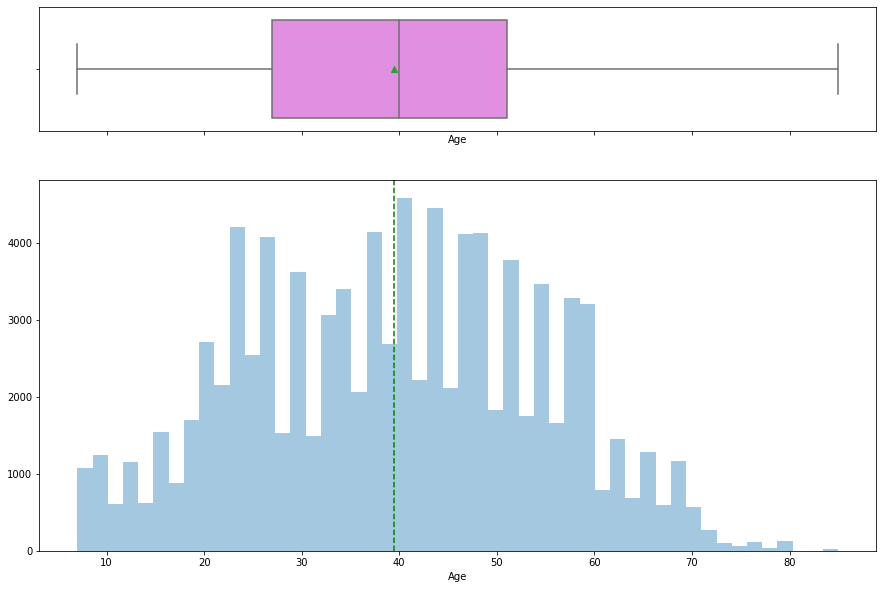

In [314]:
histogram_boxplot(Travel_Survey_train['Age']) 

In [315]:
cat_cols = list(Travel_Survey_train.select_dtypes("category").columns)
# Printing the count of each unique value in each column

for column in cat_cols:
    print(Travel_Survey_train[column].value_counts(normalize=True))
    print("-" * 40)

Female    0.507041
Male      0.492959
Name: Gender, dtype: float64
----------------------------------------
Loyal Customer       0.817332
Disloyal Customer    0.182668
Name: Customer_Type, dtype: float64
----------------------------------------
Business Travel    0.688373
Personal Travel    0.311627
Name: Type_Travel, dtype: float64
----------------------------------------
Eco         0.522807
Business    0.477193
Name: Travel_Class, dtype: float64
----------------------------------------
Green Car    0.502601
Ordinary     0.497399
Name: Seat_Class, dtype: float64
----------------------------------------


In [316]:
Travel_Survey_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       94379 non-null  int64   
 1   Gender                   94302 non-null  category
 2   Customer_Type            85428 non-null  category
 3   Age                      94346 non-null  float64 
 4   Type_Travel              85153 non-null  category
 5   Travel_Class             94379 non-null  category
 6   Travel_Distance          94379 non-null  int64   
 7   Departure_Delay_in_Mins  94322 non-null  float64 
 8   Arrival_Delay_in_Mins    94022 non-null  float64 
 9   Overall_Experience       94379 non-null  int64   
 10  Seat_Comfort             94379 non-null  int64   
 11  Seat_Class               94379 non-null  category
 12  Arrival_Time_Convenient  94379 non-null  int64   
 13  Catering                 94379 non-null  int64   
 14  Platfo

Travel_Distance
Skew : 0.47


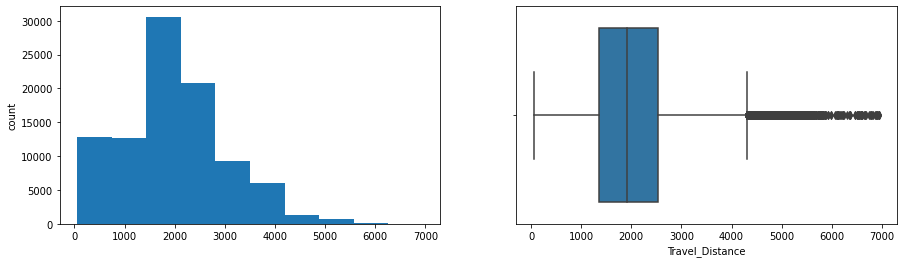

Departure_Delay_in_Mins
Skew : 7.16


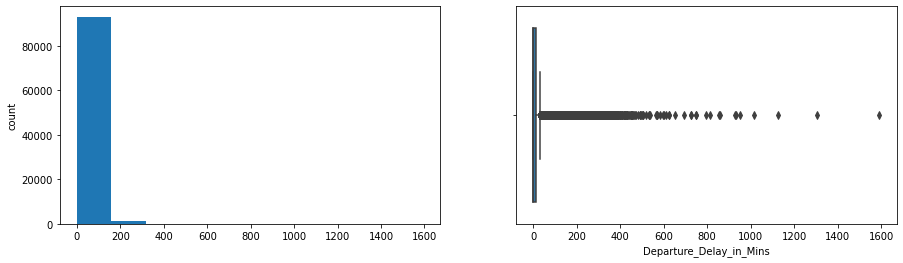

Arrival_Delay_in_Mins
Skew : 6.98


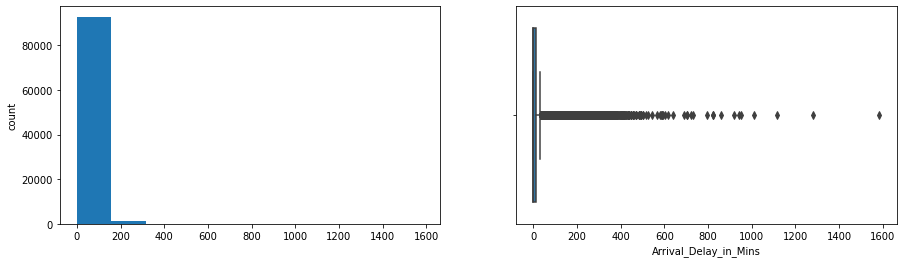

Seat_Comfort
Skew : -0.21


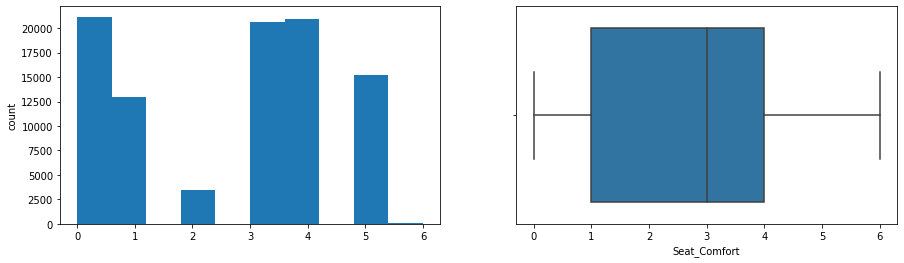

Arrival_Time_Convenient
Skew : -0.01


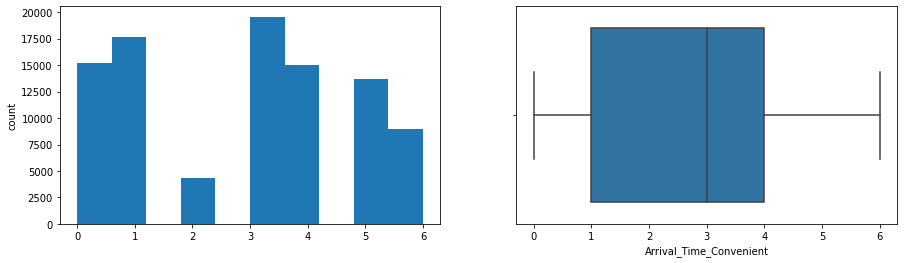

Catering
Skew : -0.1


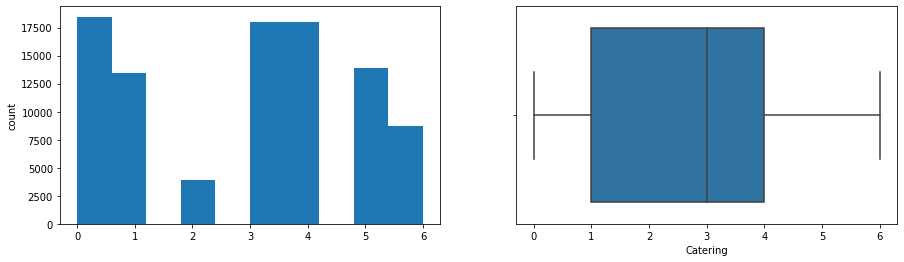

Platform_Location
Skew : 0.09


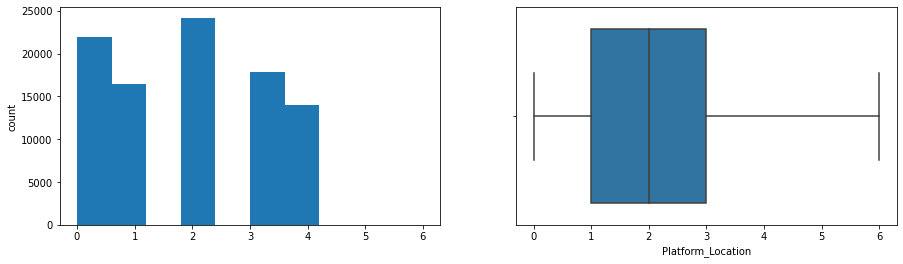

Onboard_Wifi_Service
Skew : -0.04


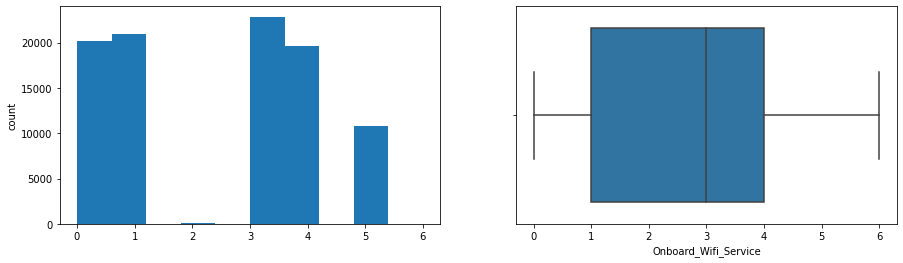

Onboard_Entertainment
Skew : -0.01


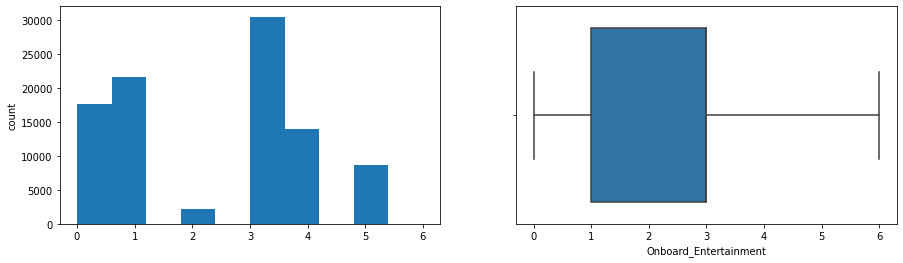

Online_Support
Skew : 0.06


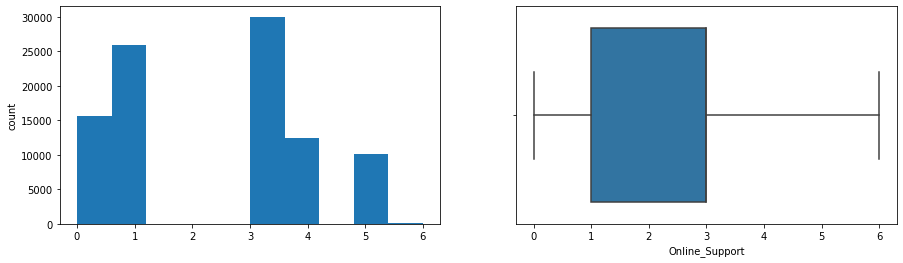

Ease_of_Online_Booking
Skew : 0.02


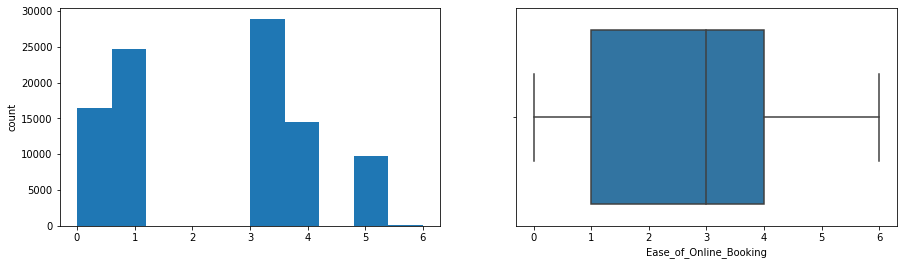

Onboard_Service
Skew : 0.2


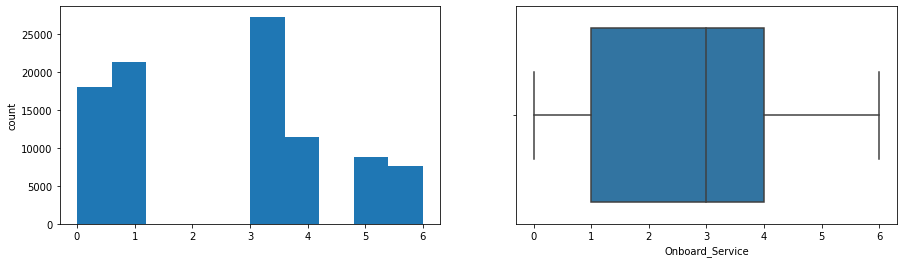

Legroom
Skew : 0.01


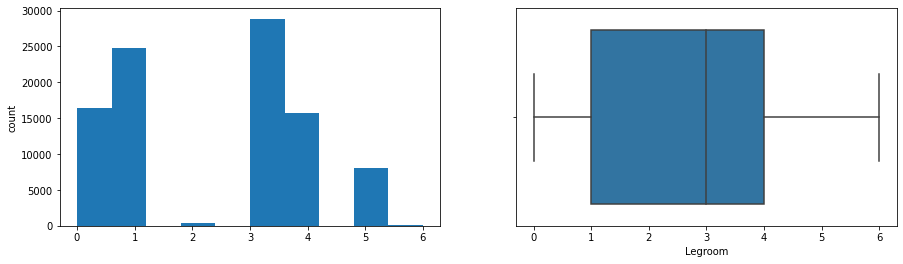

Baggage_Handling
Skew : 0.34


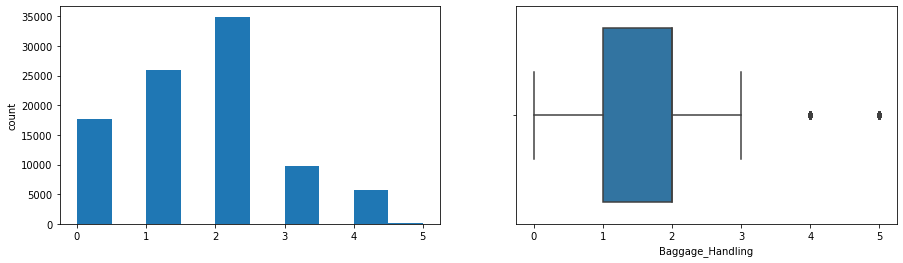

CheckIn_Service
Skew : 0.17


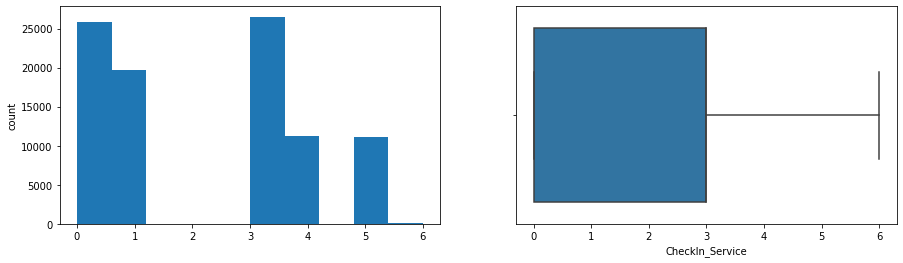

Cleanliness
Skew : 0.07


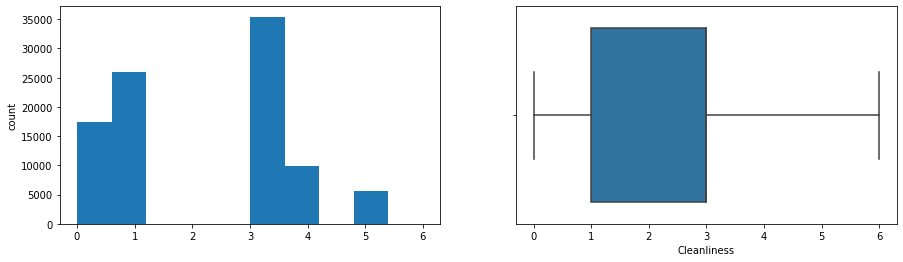

Online_Boarding
Skew : 0.11


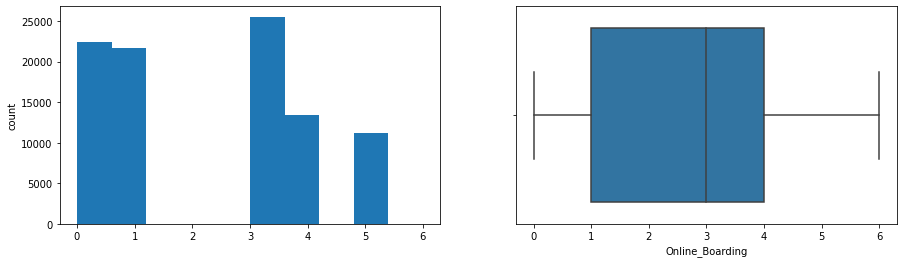

In [317]:
for col in ['Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins','Seat_Comfort','Arrival_Time_Convenient','Catering','Platform_Location','Onboard_Wifi_Service','Onboard_Entertainment','Online_Support','Ease_of_Online_Booking','Onboard_Service','Legroom','Baggage_Handling','CheckIn_Service','Cleanliness','Online_Boarding']:
    print(col)
    
    print('Skew :',round(Travel_Survey_train[col].skew(), 2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    Travel_Survey_train[col].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = Travel_Survey_train[col])
    
    plt.show()

**Observation:**
- Travel_Distance, Departure_Delay_in_Mins, and Arrival_Delay_in_Mins have outliers, all of them are strongly right skewed.

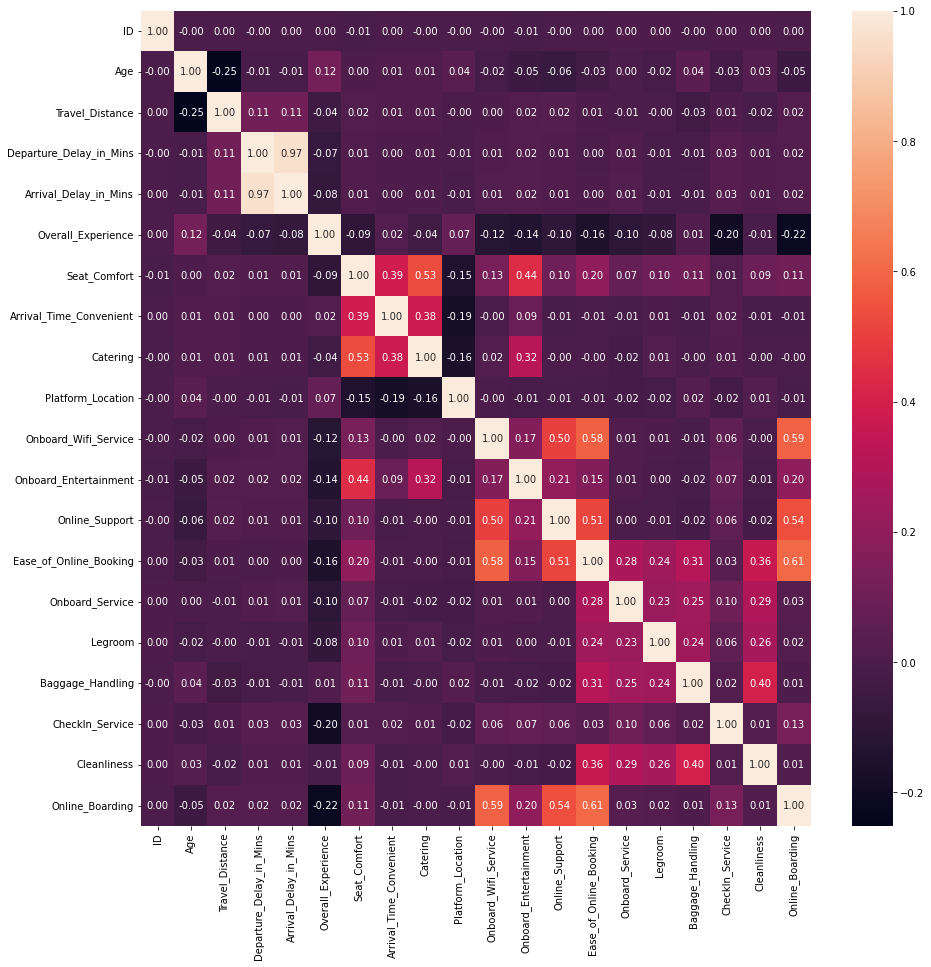

In [318]:
plt.figure(figsize = (15, 15))

sns.heatmap(Travel_Survey_train.corr(), annot = True, fmt = '0.2f')

plt.show()

**Observation:**
- Except for Age, arrival time convenient, platform location and baggage handling service, the rest are negatively relevant to our target variable Overall Experience.

**Strong Positive Correlation:**

> 

1.   Ease_of_Online_Booking and Online_Boarding
2.   Arrival_Delay_in_Mins and Departure_Delay_in_Mins
3.   Onboard_Wifi_Service and Online_Boarding
4.   Onboard_Wifi_Service and Ease_of_Online_Booking
5.   Online_Support and Ease_of_Online_Booking
6.   Online_Support and Online_Boarding

**Strong Negative Correlation:**

> 

1.  Age and Travel_Distance 
2.  Overall_Experience and Online_Boarding
3.  Overall_Experience and CheckIn_Service 
4.  Arrival_Time_Convenient Platform_Location
5.  Overall_Experience and Ease_of_Online_Booking
6.  Catering AND Platform_Location









# **3. Clean the Data**
## **3.1 Treat for missing values in both the train & test set**

As Customer Type and Type Travel are categorical variables, hence will use mode to fill the missing value.

In [319]:
def add_binary_flag(Travel_Survey_train,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    Travel_Survey_train[new_col] = Travel_Survey_train[col].isna()
    return Travel_Survey_train

In [320]:
# list of columns that has missing values in it
missing_col = [col for col in Travel_Survey_train.columns if Travel_Survey_train[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(Travel_Survey_train,colmn)

In [321]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_Travel_Survey_train = Travel_Survey_train.select_dtypes('number')

# Select string and object columns.
cat_Travel_Survey_train = Travel_Survey_train.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
# Remove _________ and complete the code
Travel_Survey_train[num_Travel_Survey_train.columns] = num_Travel_Survey_train.fillna(num_Travel_Survey_train.median())

# Fill object columns with model.
# Remove _________ and complete the code
for column in cat_Travel_Survey_train:
    mode = Travel_Survey_train[column].mode()[0]
    Travel_Survey_train[column] = Travel_Survey_train[column].fillna(mode)

# **Principle Component Analysis**

In [322]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column

categ = ['Gender','Customer_Type','Type_Travel','Travel_Class','Seat_Class','Overall_Experience']

# Encode Categorical Columns
le = LabelEncoder()
Travel_Survey_train[categ] = Travel_Survey_train[categ].apply(le.fit_transform)
Travel_Survey_train=Travel_Survey_train.drop(columns=['ID'])


In [323]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(Travel_Survey_train), columns = Travel_Survey_train.columns)

In [324]:
data_scaled.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,...,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender_missing_values_flag,Customer_Type_missing_values_flag,Age_missing_values_flag,Type_Travel_missing_values_flag,Departure_Delay_in_Mins_missing_values_flag,Arrival_Delay_in_Mins_missing_values_flag
0,-0.985222,0.445082,0.832356,-0.625411,-1.046703,-1.660469,-0.383916,-0.259227,-1.098107,0.793866,...,1.291777,0.497822,1.233517,1.601764,-0.028575,-0.323695,-0.018702,3.038038,-0.024583,-0.06162
1,1.014999,0.445082,0.567699,1.598950,0.955380,0.215099,-0.147874,-0.389511,-1.098107,1.345758,...,2.200227,1.064104,0.578552,0.456037,-0.028575,-0.323695,-0.018702,-0.329160,-0.024583,-0.06162
2,-0.985222,0.445082,0.236878,-0.625411,-1.046703,-0.892926,1.635557,2.711265,0.910658,0.793866,...,-0.525122,0.497822,-0.731378,-0.689689,-0.028575,-0.323695,-0.018702,-0.329160,-0.024583,-0.06162
3,-0.985222,0.445082,0.303042,-0.625411,-1.046703,-1.166284,-0.042966,0.079514,-1.098107,-1.413702,...,-1.433571,0.497822,-1.386343,-1.262552,-0.028575,-0.323695,-0.018702,-0.329160,-0.024583,-0.06162
4,-0.985222,0.445082,0.700027,-0.625411,-1.046703,0.002054,-0.383916,-0.389511,0.910658,-1.413702,...,0.383328,0.497822,0.578552,0.456037,-0.028575,-0.323695,-0.018702,-0.329160,-0.024583,-0.06162


In [325]:
# Defining the number of principal components to generate
n = data_scaled.shape[1]

# Finding principal components for the data
pca = PCA(n_components = n, random_state = 1)

data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

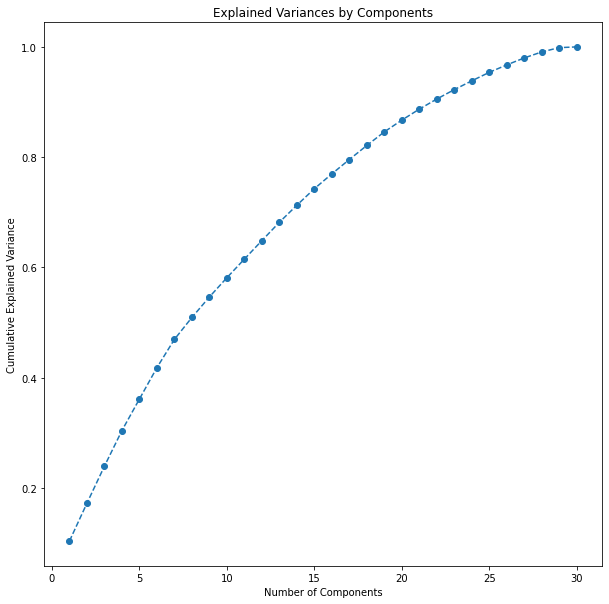

In [326]:
# Plotting the explained cumulative variance by principal components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 31), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [327]:
# Finding the least number of components that can explain more than 50% variance
sum = 0

for ix, i in enumerate(exp_var):

    sum = sum + i
    
    if(sum>0.55):
        
        print("Number of PCs that explain at least 55% variance:", ix + 1)
        break

Number of PCs that explain at least 55% variance: 10


**Observations:**

- We can see that out of the original 30 features, we have reduced the number of features through PCA to 11 principal components. The first fourteen principal components explain approximately 55% of the original variance.

- So that is about a 67% reduction in the dimensionality of the dataset with a loss of 45% in variance.

Now, let us look at these principal components as a linear combination of the original features.

In [328]:
pc_comps = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10']

data_pca = pd.DataFrame(np.round(pca.components_[:10,:],2), index = pc_comps, columns = data_scaled.columns)

data_pca.T

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Gender,0.06,0.03,0.05,-0.03,-0.06,0.03,-0.12,-0.41,0.58,0.18
Customer_Type,-0.10,-0.05,-0.09,0.08,0.08,0.07,0.54,-0.24,0.22,0.12
Age,-0.07,-0.04,-0.13,0.08,0.07,-0.08,0.41,0.26,0.46,-0.15
Type_Travel,0.03,-0.05,0.03,-0.09,-0.10,0.57,0.29,-0.12,-0.14,0.22
Travel_Class,0.12,-0.04,0.08,-0.09,-0.16,0.59,-0.03,0.17,-0.07,0.12
Travel_Distance,0.02,0.11,0.15,0.04,0.03,-0.19,-0.24,-0.56,-0.08,0.18
Departure_Delay_in_Mins,0.04,0.28,0.51,0.35,0.04,-0.01,0.14,0.08,-0.02,0.01
Arrival_Delay_in_Mins,0.05,0.28,0.51,0.35,0.02,-0.01,0.15,0.08,-0.02,0.00
Overall_Experience,-0.22,-0.06,-0.14,0.04,0.12,-0.29,0.33,0.01,-0.30,0.08
Seat_Comfort,0.24,0.41,-0.29,0.05,0.01,-0.01,0.06,-0.03,-0.00,0.09


In [329]:
def color_high(val):
    if val <= -0.06:
        return 'background: pink'
    
    elif val >= 0.06:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Gender,0.060000,0.030000,0.050000,-0.030000,-0.060000,0.030000,-0.120000,-0.410000,0.580000,0.180000
Customer_Type,-0.100000,-0.050000,-0.090000,0.080000,0.080000,0.070000,0.540000,-0.240000,0.220000,0.120000
Age,-0.070000,-0.040000,-0.130000,0.080000,0.070000,-0.080000,0.410000,0.260000,0.460000,-0.150000
Type_Travel,0.030000,-0.050000,0.030000,-0.090000,-0.100000,0.570000,0.290000,-0.120000,-0.140000,0.220000
Travel_Class,0.120000,-0.040000,0.080000,-0.090000,-0.160000,0.590000,-0.030000,0.170000,-0.070000,0.120000
Travel_Distance,0.020000,0.110000,0.150000,0.040000,0.030000,-0.190000,-0.240000,-0.560000,-0.080000,0.180000
Departure_Delay_in_Mins,0.040000,0.280000,0.510000,0.350000,0.040000,-0.010000,0.140000,0.080000,-0.020000,0.010000
Arrival_Delay_in_Mins,0.050000,0.280000,0.510000,0.350000,0.020000,-0.010000,0.150000,0.080000,-0.020000,0.000000
Overall_Experience,-0.220000,-0.060000,-0.140000,0.040000,0.120000,-0.290000,0.330000,0.010000,-0.300000,0.080000
Seat_Comfort,0.240000,0.410000,-0.290000,0.050000,0.010000,-0.010000,0.060000,-0.030000,-0.000000,0.090000


**Observations:**
- PC1 is relatively positively related to Ease_of_Online_Booking and Online_Boarding. So the better the online service, the better the satisfactory. 
- PC2 captures the clients who are more satisfied with catering and arrival time convienient. 
- PC3 is closely relevant to delayed on arrival and departure.

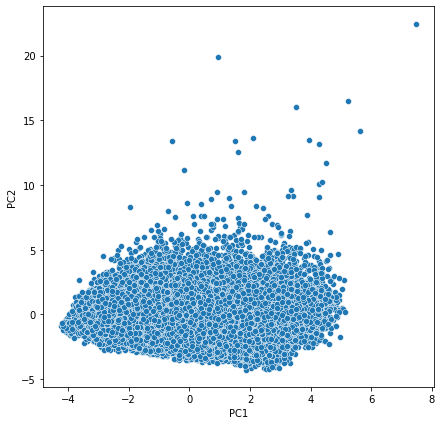

In [330]:
plt.figure(figsize = (7,7))

sns.scatterplot(x = data_pca1[0], y = data_pca1[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

In [331]:
#TSNE
# Fitting t-SNE with number of components equal to 2 
tsne = TSNE(n_components = 2, random_state = 1)

data_tsne = tsne.fit_transform(data_scaled)

KeyboardInterrupt: ignored

# **4. Modelling**
##**4.1 Logistic Regression**

In [279]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
# Remove _________ and complete the code
X_train = Travel_Survey_train.drop(columns=['Overall_Experience'])

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
# Remove _________ and complete the code
X_train = pd.get_dummies(X_train, drop_first = True)

# Create y(dependent varibale)
# Remove _________ and complete the code

y_train = Travel_Survey_train['Overall_Experience']

In [280]:
# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
# Remove _________ and complete the code
X_test = pd.get_dummies(Travel_Survey_test)

# Create y(dependent varibale)
# Remove _________ and complete the code

y_test = Travel_Survey_test['Overall_Experience']

KeyError: ignored

## **3.5 Scale the data**






In [ ]:
features = one_hot_data.drop(['Overall_Experience'], axis = 1)

target = one_hot_data['Admit']